In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.optimize import curve_fit

28527.423029338705 0.09884010923313119


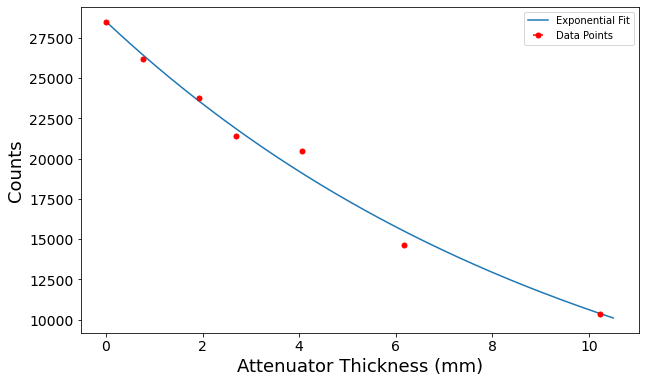

In [2]:
thickness = [10.227, 6.163, 4.064, 2.699, 1.925, 0.774, 0]
counts = [10378, 14631, 20496, 21397, 23744, 26184, 28506]
error = [0.00071, 0.0005, 0.0005, 0.00071, 0.0005, 0.0005, 0]

fig = plt.figure(figsize = (10, 6))
#plt.plot(thickness, counts)
plt.errorbar(thickness, counts, xerr = error, fmt='r.', markersize = 10, label='Data Points')

def exp_function(x, a, x0):
    return a*np.exp(-x0*x)
popt, pcov = curve_fit(exp_function, thickness, counts, p0 = [30000, 2])

x = np.arange(0, 10.5, 0.001)
plt.plot(x, exp_function(x, popt[0], popt[1]), label = 'Exponential Fit')
print(popt[0], popt[1])

plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Attenuator Thickness (mm)', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)

plt.savefig('Thickness_Counts.png', bbox_inches='tight')

-0.1785959562197276 -0.11223562523963625


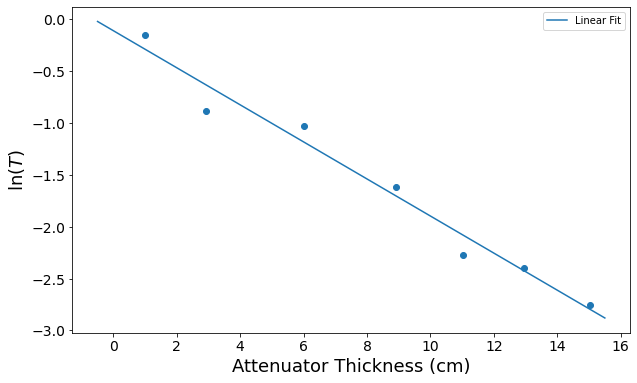

In [14]:
thickness = [15.045, 12.935, 11.030, 8.925, 6.020, 2.905, 1.000]
ln_T = [-2.758413584, -2.394420561, -2.272823088, -1.615737414, -1.031612905, -0.8899005488, -0.1563033028]

fig = plt.figure(figsize = (10, 6))
#plt.plot(thickness, counts)
plt.scatter(thickness, ln_T)

def line_function(x, m, b):
    return m*x + b
popt, pcov = curve_fit(line_function, thickness, ln_T, p0 = [-0.178, -0.12])

x = np.arange(-0.5, 15.5, 0.001)
plt.plot(x, line_function(x, popt[0], popt[1]), label = 'Linear Fit')
print(popt[0], popt[1])

plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Attenuator Thickness (cm)', fontsize = 18)
plt.ylabel('ln($T$)', fontsize = 18)

plt.savefig('lnT_x.png', bbox_inches='tight')

[-5.91695442e-05 -8.97163581e-04] [-9.12046931e-05  1.02165734e-03]


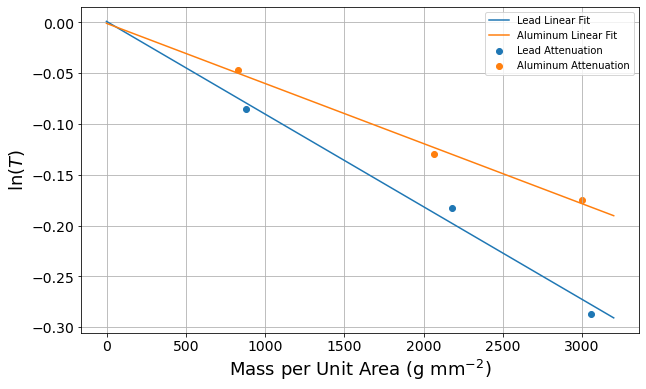

In [15]:
pb_mpua = [876.94, 2181.03, 3057.97]
al_mpua = [826.74, 2065.23, 3000.51]
pb_trans = [0.9185, 0.8329, 0.7506]
al_trans = [0.9540, 0.8786, 0.8396]

pb_trans = [np.log(x) for x in pb_trans]
al_trans = [np.log(x) for x in al_trans]

fig = plt.figure(figsize = (10, 6))
#plt.plot(thickness, counts)
plt.scatter(pb_mpua, pb_trans, label = 'Lead Attenuation')
plt.scatter(al_mpua, al_trans, label = 'Aluminum Attenuation')

def line_function(x, m, b):
    return m*x + b
al_popt, al_pcov = curve_fit(line_function, al_mpua, al_trans, p0 = [-0.178, -0.12])
pb_popt, pb_pcov = curve_fit(line_function, pb_mpua, pb_trans, p0 = [-0.178, -0.12])

x = np.arange(-0.5, 3200, 1)
plt.plot(x, line_function(x, pb_popt[0], pb_popt[1]), label = 'Lead Linear Fit')
plt.plot(x, line_function(x, al_popt[0], al_popt[1]), label = 'Aluminum Linear Fit')
#print(popt[0], popt[1])

plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Mass per Unit Area (g mm$^{-2}$)', fontsize = 18)
plt.ylabel('ln($T$)', fontsize = 18)
plt.grid()

plt.savefig('Pb vs Al.png', bbox_inches='tight')

print(al_popt, pb_popt)